In [1]:
# Import necessary libraries for data handling, scaling, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.preprocessing import StandardScaler

In [2]:
import sys
!{sys.executable} -m pip install liac-arff

In [3]:
from scipy.io import arff

import pandas as pd

In [9]:
import arff
import pandas as pd

with open(r"C:\Users\param\Downloads\depression_dataset.arff", 'r') as f:
    dataset = arff.load(f)

# Convert to DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

print(df.head())


     id  Gender   Age           City Profession  Academic Pressure  \
0   2.0    Male  33.0  Visakhapatnam    Student                5.0   
1   8.0  Female  24.0      Bangalore    Student                2.0   
2  26.0    Male  31.0       Srinagar    Student                3.0   
3  30.0  Female  28.0       Varanasi    Student                3.0   
4  32.0  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3 

In [10]:
# Identify numerical columns to scale
# Exclude categorical columns, identifiers ('id'), and the target ('Depression' is binary 0/1, so not scaled here)
numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                  'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Extract numerical data subset
X_num = df[numerical_cols]

In [11]:
# Display descriptive statistics before scaling to observe original scales
print("\nStatistics before scaling:")
print(X_num.describe())


Statistics before scaling:
                Age  Academic Pressure  Work Pressure          CGPA  \
count  27901.000000       27901.000000   27901.000000  27901.000000   
mean      25.822300           3.141214       0.000430      7.656104   
std        4.905687           1.381465       0.043992      1.470707   
min       18.000000           0.000000       0.000000      0.000000   
25%       21.000000           2.000000       0.000000      6.290000   
50%       25.000000           3.000000       0.000000      7.770000   
75%       30.000000           4.000000       0.000000      8.920000   
max       59.000000           5.000000       5.000000     10.000000   

       Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count        27901.000000      27901.000000      27901.000000   
mean             2.943837          0.000681          7.156984   
std              1.361148          0.044394          3.707642   
min              0.000000          0.000000          0.000000   
25%    

In [12]:
# Initialize and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Convert scaled data back to a DataFrame for easier handling
df_scaled = pd.DataFrame(X_scaled, columns=numerical_cols)

In [13]:
# Display descriptive statistics after scaling (should show mean ~0 and std ~1)
print("\nStatistics after scaling:")
print(df_scaled.describe())


Statistics after scaling:
                Age  Academic Pressure  Work Pressure          CGPA  \
count  2.790100e+04       2.790100e+04   2.790100e+04  2.790100e+04   
mean   1.718993e-16       1.833593e-17  -8.913299e-19  4.013531e-16   
std    1.000018e+00       1.000018e+00   1.000018e+00  1.000018e+00   
min   -1.594566e+00      -2.273869e+00  -9.776766e-03 -5.205822e+00   
25%   -9.830196e-01      -8.261043e-01  -9.776766e-03 -9.288922e-01   
50%   -1.676248e-01      -1.022220e-01  -9.776766e-03  7.744428e-02   
75%    8.516186e-01       6.216603e-01  -9.776766e-03  8.593950e-01   
max    6.763230e+00       1.345543e+00   1.136492e+02  1.593749e+00   

       Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count        2.790100e+04      2.790100e+04      2.790100e+04   
mean         5.093314e-19      3.310654e-18      5.016914e-17   
std          1.000018e+00      1.000018e+00      1.000018e+00   
min         -2.162799e+00     -1.533958e-02     -1.930368e+00   
25%     

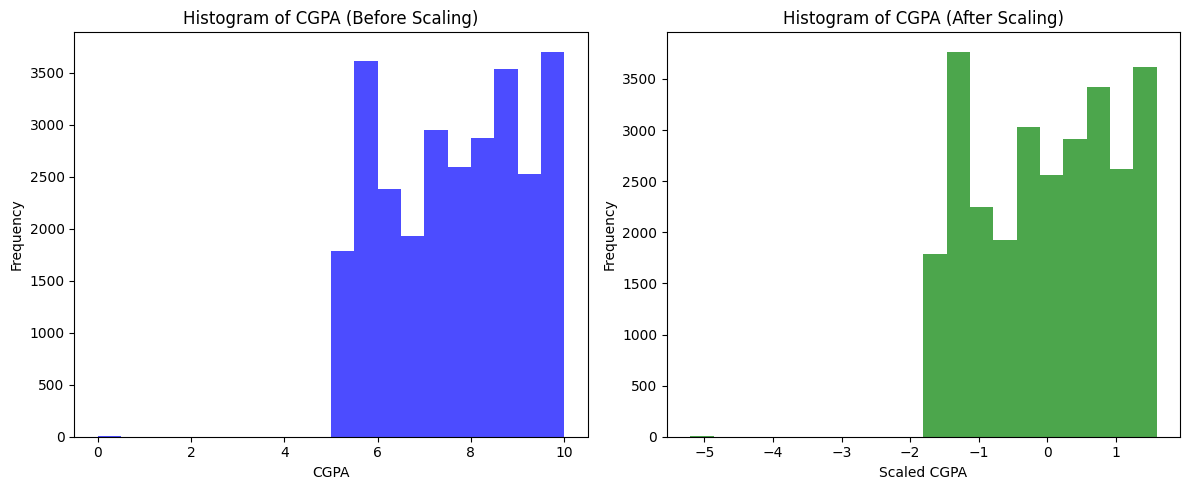

In [14]:
# Create figure for side-by-side histograms
plt.figure(figsize=(12, 5))

# Before scaling
plt.subplot(1, 2, 1)
plt.hist(X_num['CGPA'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of CGPA (Before Scaling)')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

# After scaling
plt.subplot(1, 2, 2)
plt.hist(df_scaled['CGPA'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of CGPA (After Scaling)')
plt.xlabel('Scaled CGPA')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
import os
import matplotlib.pyplot as plt

# Ensure the directory exists
os.makedirs("results/eda_visualizations", exist_ok=True)

# Save the histogram
plt.savefig("results/eda_visualizations/cgpa_histogram_before_after.png")
print("Histogram saved to 'results/eda_visualizations/cgpa_histogram_before_after.png'")


Histogram saved to 'results/eda_visualizations/cgpa_histogram_before_after.png'


<Figure size 640x480 with 0 Axes>

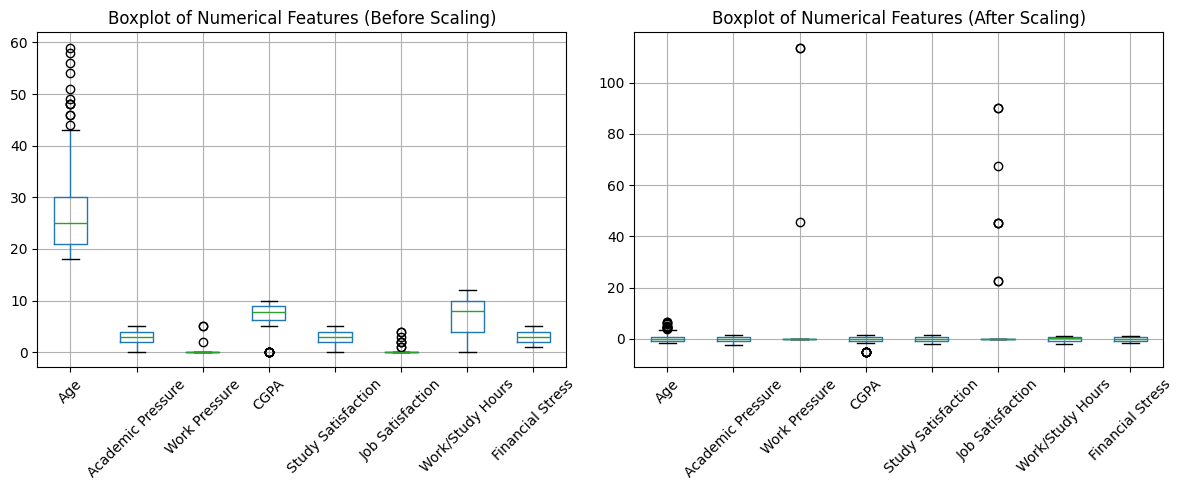

In [17]:
# Create figure for side-by-side boxplots
plt.figure(figsize=(12, 5))

# Before scaling
plt.subplot(1, 2, 1)
X_num.boxplot()
plt.title('Boxplot of Numerical Features (Before Scaling)')
plt.xticks(rotation=45)

# After scaling
plt.subplot(1, 2, 2)
df_scaled.boxplot()
plt.title('Boxplot of Numerical Features (After Scaling)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Save the boxplot as a PNG file for the results/eda_visualizations folder
plt.savefig('results/eda_visualizations/numerical_boxplot_before_after.png')
print("Boxplot saved to 'results/eda_visualizations/numerical_boxplot_before_after.png'")

Boxplot saved to 'results/eda_visualizations/numerical_boxplot_before_after.png'


<Figure size 640x480 with 0 Axes>

In [19]:
# Replace original numerical columns with scaled versions for group pipeline integration
df[numerical_cols] = df_scaled

# Display final dataframe head to verify integration
print("\nFinal dataframe with scaled numerical features:")
print(df.head())

# Note: This scaled dataframe can now be passed to other group members' preprocessing steps or saved as a processed dataset in results/outputs


Final dataframe with scaled numerical features:
     id  Gender       Age           City Profession  Academic Pressure  \
0   2.0    Male  1.463165  Visakhapatnam    Student           1.345543   
1   8.0  Female -0.371474      Bangalore    Student          -0.826104   
2  26.0    Male  1.055467       Srinagar    Student          -0.102222   
3  30.0  Female  0.443921       Varanasi    Student          -0.102222   
4  32.0  Female -0.167625         Jaipur    Student           0.621660   

   Work Pressure      CGPA  Study Satisfaction  Job Satisfaction  \
0      -0.009777  0.893393           -0.693425          -0.01534   
1      -0.009777 -1.194076            1.510636          -0.01534   
2      -0.009777 -0.425724            1.510636          -0.01534   
3      -0.009777 -1.404862           -0.693425          -0.01534   
4      -0.009777  0.322229            0.041262          -0.01534   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1